# StackExchange questions and Tags - Modélisation

This Notebook is about Stackoverflow questions tag prediction 
- I start by importing libraries and Data 
- I make a first unsupervised approch with LDA
- I make different approaches for feature engineering : Bag of Words and TF-IDF
- I finally try supervised approch to classify and predict the tags

## Libraries and frameworks

In [1]:
!pip install tqdm
!pip install flake8 --ignore-installed
!pip install pycodestyle_magic
!pip install wordcloud
!pip install gensim
!pip install pyLDAvis

  Using cached https://files.pythonhosted.org/packages/f8/1f/7ea40d1e4146ea55dbab41cda1376db092a75794914169aabd7e8d7a7def/flake8-3.7.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/84/f2/ed0ffb887f8138a8fe5a621b8c0bb9598bfb3989e029f6c6a85ee66628ee/pyflakes-2.1.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0e/0c/04a353e104d2f324f8ee5f4b32012618c1c86dd79e52a433b64fceed511b/pycodestyle-2.5.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/87/89/479dc97e18549e21354893e4ee4ef36db1d237534982482c3681ee6e7b57/mccabe-0.6.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ac/c6/44694103f8c221443ee6b0041f69e2740d89a25641e62fb4f2ee568f2f9c/entrypoints-0.3-py2.py3-none-any.whl


ERROR: spyder 3.3.6 requires pyqt5<5.13; python_version >= "3", which is not installed.
ERROR: spyder 3.3.6 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.


In [18]:
import pandas as pd
import numpy as np
from pprint import pprint

from tqdm import tqdm

from bs4 import BeautifulSoup
import nltk
import heapq
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.decomposition import SparsePCA, TruncatedSVD

# Classifiers
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


import scipy.sparse
import pickle

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn  # don't skip this
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.cm as cm
from matplotlib import pyplot as plt

# Enable logging for gensim
import logging
logging.basicConfig(format='%(asctime)s \
: %(levelname)s : %(message)s', level=logging.ERROR)

In [3]:
%load_ext pycodestyle_magic
%pycodestyle_on
%matplotlib inline

plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

pyLDAvis.enable_notebook()

## Data

In [ ]:
df = pd.read_csv('C:/Users/ayoub/OCP6 Data/df.csv', sep=',')

In [ ]:
df.head()

In [ ]:
df.columns

In [19]:
X_C = scipy.sparse.load_npz('C:/Users/ayoub/OCP6 Data//X_C.npz')
X_T = scipy.sparse.load_npz('C:/Users/ayoub/OCP6 Data//X_T.npz')
Y_C = scipy.sparse.load_npz('C:/Users/ayoub/OCP6 Data//Y_C.npz')
#Y_T = scipy.sparse.load_npz('C:/Users/ayoub/OCP6 Data//Y_T.npz')

2020-02-02 22:18:12,624 : INFO : 4:1: E265 block comment should start with '# '


In [ ]:
with open("C:/Users/ayoub/OCP6 Data/X_C_columns.txt", "rb") as fp:
    X_C_columns = pickle.load(fp)
with open("C:/Users/ayoub/OCP6 Data/X_T_columns.txt", "rb") as fp:
    X_T_columns = pickle.load(fp)
with open("C:/Users/ayoub/OCP6 Data/Y_C_columns.txt", "rb") as fp:
    Y_C_columns = pickle.load(fp)
with open("C:/Users/ayoub/OCP6 Data/Y_T_columns.txt", "rb") as fp:
    Y_T_columns = pickle.load(fp)

In [ ]:
X_C.shape, X_T.shape, Y_C.shape, Y_T.shape

In [ ]:
X_C.dtype

In [ ]:
pd.DataFrame(Y_T.toarray(), columns = Y_T_columns).head()

## Unsupervised approach

### Building the Topic Model with LDA 

In [ ]:
Cvectorizer = CountVectorizer(tokenizer=lambda x: x.split(' '), max_df=0.5, min_df=10)
X = Cvectorizer.fit_transform(df.sentence)

In [ ]:
lda_tf = LatentDirichletAllocation(n_components=30, random_state=0)
lda_tf.fit(X)

In [ ]:
data = pyLDAvis.sklearn.prepare(lda_tf, X, Cvectorizer, mds='mmds')

In [ ]:
pyLDAvis.show(data)

After playing with pyLDavis, i would say that it will be complicated to do all the work and predict tags with an unsupervised approch, so I will try some classification methods

## Supervised approach

### with Bag Of Words

Because of a memory problem we have to reduce 

In [11]:
X_C.shape

(103676, 31541)

In [25]:
svd = TruncatedSVD(n_components=100)
svd.fit(X_C)

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=5,
             random_state=None, tol=0.0)

In [ ]:
svd.explained_variance_ratio_.cumsum()

In [ ]:
X_C = svd.fit_transform(X_C)

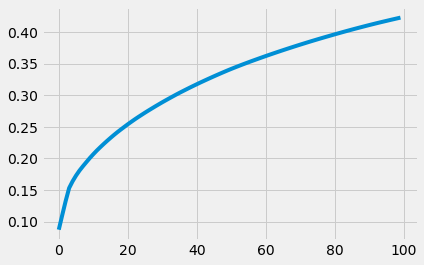

In [26]:
plt.plot(svd.explained_variance_ratio_.cumsum())

In [27]:
svd = TruncatedSVD(n_components=100)
X_C = svd.fit_transform(X_C)

In [32]:
Y_C = Y_C.todense()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_C, Y_C, test_size=0.25)

#### Base line RF_Classifier

In [34]:
clf = RandomForestClassifier(n_estimators=100)

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
m = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(m, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
y.head()

In [ ]:
x = pd.DataFrame(X_C.toarray(), columns = X_C_columns)
y = pd.DataFrame(Y_C.toarray(), columns = Y_C_columns)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
x_test.shape

In [ ]:
y_pred.shape

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
m = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(m, annot=True, fmt='d', cmap='YlGnBu')

### with TF_IDF

In [ ]:
xt_train, xt_test, yt_train, yt_test = train_test_split(X_T, Y_C, test_size=0.25)

# Brouillon

In [ ]:
Cvectorizer = CountVectorizer(tokenizer=lambda x: x.split(' '), max_df=0.5, min_df=10)
X = Cvectorizer.fit_transform(df_test.sentence)

In [ ]:
lda_tf = LatentDirichletAllocation(n_components=30, random_state=0)
lda_tf.fit(X)

In [ ]:
pyLDAvis.sklearn.prepare(lda_tf, X, Cvectorizer, mds='mmds')